# DATA SCIENCE WITH PYTHON  REPORT COVID-19 

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

# Data Visualization COVID-19

In [1]:
from IPython.display import IFrame
IFrame('https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6', height=700, width=960)

# Data Analaysis COVID-19 Report i Data Science with Python

In [2]:
%config InlineBackend.figure_formats = ['svg']
import math
from numpy import log, exp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (11, 4)   # need bigger size otherwise xlabels are cut-off in svg files

import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')
import scipy
import numpy as np
import iminuit

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')

def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#

def fetch_data(names = ['confirmed', 'deaths']):
    """Return 3 data frames:
    [confirmed, deaths], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_covid19_" + name + "_global.csv")
        df = pd.read_csv(url, index_col=1)
    
        if not name == 'Recovered':
            location_info['Lat'] = df['Lat']
            location_info['Long'] = df['Long']
            location_info['Province/State'] = df['Province/State']
            location_info['location'] = df.index + "-" + df['Province/State']
        else:
            pass  # no location info in recovered since 14 March
        ## df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs


confirmed, deaths = fetch_data()

# show counries with mosth deaths
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[0:10,-8:]

confirmed : last data point from 2020-06-06 00:00:00
deaths    : last data point from 2020-06-06 00:00:00


2020-05-30 00:00:00  2020-05-31 00:00:00  2020-06-01 00:00:00  \
Country/Region                                                                  
US                           103776               104381               105149   
United Kingdom                38376                38489                39045   
Brazil                        28834                29314                29937   
Italy                         33340                33415                33475   
France                        28720                28751                28779   
Spain                         27125                27127                27127   
Mexico                         9779                 9930                10167   
Belgium                        9453                 9467                 9486   
Germany                        8530                 8540                 8555   
Iran                           7734                 7797                 7878   

                2020-06-02 00:00:00  2020-06-03 00:00:00  2020-06-04 00:00:00  \
Country/Region                                                                  
US                           106180               107175               108211   
United Kingdom                39369                39728                39904   
Brazil                        31199                32548                34021   
Italy                         33530                33601                33689   
France                        28886                28967                29010   
Spain                         27127                27128                27133   
Mexico                        10637                11729                12545   
Belgium                        9505                 9522                 9548   
Germany                        8563                 8602                 8635   
Iran                           7942                 8012                 8071   

                2020-06-05 00:00:00  2020-06-06 00:00:00  
Country/Region                                            
US                           109132               109802  
United Kingdom                40261                40465  
Brazil                        35026                35930  
Italy                         33774                33846  
France                        29056                29087  
Spain                         27134                27135  
Mexico                        13170                13511  
Belgium                        9566                 9580  
Germany                        8658                 8673  
Iran                           8134                 8209

In [3]:
deaths.sort_values(by=deaths.columns[-1], ascending=False).iloc[:,-8:]


2020-05-30 00:00:00  2020-05-31 00:00:00  2020-06-01 00:00:00  \
Country/Region                                                                  
US                           103776               104381               105149   
United Kingdom                38376                38489                39045   
Brazil                        28834                29314                29937   
Italy                         33340                33415                33475   
France                        28720                28751                28779   
...                             ...                  ...                  ...   
Laos                              0                    0                    0   
Eritrea                           0                    0                    0   
Seychelles                        0                    0                    0   
Fiji                              0                    0                    0   
Lesotho                           0                    0                    0   

                2020-06-02 00:00:00  2020-06-03 00:00:00  2020-06-04 00:00:00  \
Country/Region                                                                  
US                           106180               107175               108211   
United Kingdom                39369                39728                39904   
Brazil                        31199                32548                34021   
Italy                         33530                33601                33689   
France                        28886                28967                29010   
...                             ...                  ...                  ...   
Laos                              0                    0                    0   
Eritrea                           0                    0                    0   
Seychelles                        0                    0                    0   
Fiji                              0                    0                    0   
Lesotho                           0                    0                    0   

                2020-06-05 00:00:00  2020-06-06 00:00:00  
Country/Region                                            
US                           109132               109802  
United Kingdom                40261                40465  
Brazil                        35026                35930  
Italy                         33774                33846  
France                        29056                29087  
...                             ...                  ...  
Laos                              0                    0  
Eritrea                           0                    0  
Seychelles                        0                    0  
Fiji                              0                    0  
Lesotho                           0                    0  

[266 rows x 8 columns]

In [4]:
def double_time_exponential(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate(double_time):
    return log(2)/double_time

def double_time(growth_rate):
    return log(2)/growth_rate


# t1, t2, q1, q2 = 0, 1, 1, 2
# double_time_exponential(t1, t2, q1, q2), growth_rate(double_time_exponential(t1, t2, q1, q2) )

def double_time_exponential(q2_div_q1, t2_minus_t1=None):
    # print(f"double_time_exponential: {q2_div_q1}, {t2_minus_t1} ")
    if t2_minus_t1 is None:
        t2_minus_t1 = np.ones(q2_div_q1.shape)
        # print(f"shape t: {t2_minus_t1.shape}, shape q: {q2_div_q1.shape}")
        # print(f"type t: {type(t2_minus_t1)}, type q: {type(q2_div_q1.shape)}")

    return t2_minus_t1 * np.log(2) / np.log(q2_div_q1) 


def stack_country(country = "Germany"):

    #create one DataFrame for country/region
    c_df = pd.DataFrame()
    if country == "United Kingdom":
        # UK has many provinces that keep changing. Sum to get all (most relevant is mainland UK)
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
    elif country == "China": 
        # Use only Hubei province
        tmp = confirmed.loc[country]
        c_df['confirmed'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        tmp = deaths.loc[country]
        c_df['deaths'] = tmp[tmp['Province/State'] == "Hubei"].T['China']
        c_df.drop("Province/State", inplace=True)
    elif country in ['France']:
        c_df['confirmed'] = confirmed.loc[country].sum()
        c_df['deaths'] = deaths.loc[country].sum()
        c_df.drop('Province/State', inplace=True)
    elif country in ['US']:
        c_df['confirmed'] = confirmed.loc[country]
        c_df['deaths'] = deaths.loc[country]
    else:
        c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
        c_df['deaths'] = deaths.loc[country].drop('Province/State')

    # drop days with confirmed cases = 0
    c1 = c_df[c_df['confirmed'] != 0][1:]
    
    # drop another row
    c_df = c1
  
    c_df.index = string_to_date(c_df.index)
    c_df.country = country  # remember which country we work on, just in case
    
    c_df['days-td'] = c_df.index - c_df.index.min()  # days as TimeDelta type
    c_df['days'] = c_df['days-td'].astype("timedelta64[D]").astype(float)
    
    c_df['new_confirmed'] = c_df['confirmed'].diff()
    c_df['new_deaths'] = c_df['deaths'].diff()
    
    c_df['confirmed_pct'] = c_df['confirmed'].pct_change()+1
    c_df['deaths_pct'] = c_df['deaths'].pct_change()+1
    
    #return c_df
    # growth rate
    c_df['deaths_double_time'] = double_time_exponential(c_df['deaths_pct'].values)
    c_df['confirmed_double_time'] = double_time_exponential(c_df['confirmed_pct'].values)
    c_df['deaths_growth_rate'] = growth_rate(c_df['deaths_double_time'].values)
    c_df['confirmed_growth_rate'] = growth_rate(c_df['confirmed_double_time'].values)

    return c_df

In [5]:
import warnings
warnings.filterwarnings('ignore')
c = stack_country("Germany")
#c.tail(n=5)
c2 = stack_country("United Kingdom")
#c.tail(n=5)
#c2 = stack_country("Spain")
#c.tail(n=5)
c2 = stack_country("Italy")
#c2.tail(n=5)
#c2 = stack_country("France")
#c2.tail(n=5)
c2 = stack_country("China")
#c2.tail(n=5)
#c2 = stack_country("US")

c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-28         4      0   0 days    0.0           NaN        NaN   
2020-01-29         4      0   1 days    1.0             0          0   
2020-01-30         4      0   2 days    2.0             0          0   
2020-01-31         5      0   3 days    3.0             1          0   
2020-02-01         8      0   4 days    4.0             3          0   
...              ...    ...      ...    ...           ...        ...   
2020-06-02    183879   8563 126 days  126.0           285          8   
2020-06-03    184121   8602 127 days  127.0           242         39   
2020-06-04    184472   8635 128 days  128.0           351         33   
2020-06-05    184924   8658 129 days  129.0           452         23   
2020-06-06    185450   8673 130 days  130.0           526         15   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-28            NaN         NaN                 NaN   
2020-01-29       1.000000         NaN                 NaN   
2020-01-30       1.000000         NaN                 NaN   
2020-01-31       1.250000         NaN                 NaN   
2020-02-01       1.600000         NaN                 NaN   
...                   ...         ...                 ...   
2020-06-02       1.001552    1.000935          741.580786   
2020-06-03       1.001316    1.004554          152.536550   
2020-06-04       1.001906    1.003836          181.026717   
2020-06-05       1.002450    1.002664          260.577981   
2020-06-06       1.002844    1.001733          400.431026   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-28                    NaN                 NaN                    NaN  
2020-01-29                    inf                 NaN               0.000000  
2020-01-30                    inf                 NaN               0.000000  
2020-01-31               3.106284                 NaN               0.223144  
2020-02-01               1.474770                 NaN               0.470004  
...                           ...                 ...                    ...  
2020-06-02             446.864601            0.000935               0.001551  
2020-06-03             527.020921            0.004544               0.001315  
2020-06-04             363.944618            0.003829               0.001905  
2020-06-05             283.236359            0.002660               0.002447  
2020-06-06             244.033765            0.001731               0.002840  

[131 rows x 12 columns]

In [6]:
confirmed.loc["US"]

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-06-02 00:00:00    1831821
2020-06-03 00:00:00    1851520
2020-06-04 00:00:00    1872660
2020-06-05 00:00:00    1897380
2020-06-06 00:00:00    1920061
Name: US, Length: 138, dtype: object

In [7]:
def overview_plot(c_df, rollingwindow=7):
    """expect """
    fig, axes = plt.subplots(4, 1, figsize=(8, 14))
    ax = axes[0]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'], '-b', label='confirmed')
    ax.plot(c_df.index, c_df['deaths'], '-r', label='deaths')
    ax.legend(loc='center left')
    country = c_df.country
    ax.set_title(country + " accumulated data")
    ax.set_yscale('log')

    ax = axes[1]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['confirmed'].diff(), 'ob', label='day-to-day change confirmed')
    ax.plot(c_df.index, c_df['deaths'].diff(), 'xr', label='day-to-day change deaths')
    ax.legend(loc='center left')
    #ax.set_yscale('log')
    

    ax = axes[2]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_double_time'], 'xr', label='double time deaths')
    ax.plot(c_df.index, c_df['deaths_double_time'].rolling(rollingwindow, center=True).mean(),
            '-r', label='double time deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_double_time'], 'ob', label='double time confirmed')
    ax.plot(c_df.index, c_df['confirmed_double_time'].rolling(rollingwindow, center=True).mean(), 
            '-b', label='double time confirmed rolling')
    ax.legend(loc='center left')
    ax.set_ylabel('days to double numbers \n bigger is better')
    maxy = min(20, max(c_df['confirmed_double_time']))
    ax.set_ylim(0, maxy)

    ax = axes[3]
    set_date_formatting(ax)
    ax.plot(c_df.index, c_df['deaths_growth_rate'], 'xr', label='growth rate deaths')
    ax.plot(c_df.index, c_df['deaths_growth_rate'].rolling(rollingwindow, center=True).mean(), 'r-', label='growth rate deaths rolling')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'], 'ob', label='confirmed growth rate')
    ax.plot(c_df.index, c_df['confirmed_growth_rate'].rolling(rollingwindow, center=True).mean(), 
            'b-', label='confirmed growth rate rolling')
    ax.legend(loc='center left')
    ax.set_ylim(0, 0.5)
    ax.set_ylabel('growth rate r in\n f(t) = exp(r*t)\n(smaller is better)')
    
    # fig.savefig(f"figures/{country}-overview.svg")
    return axes

In [8]:
import warnings
warnings.filterwarnings('ignore')
china = stack_country('China')
germany = stack_country('Germany')
uk = stack_country("United Kingdom")
us = stack_country("US")
italy = stack_country("Italy")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112017890>,
      dtype=object)

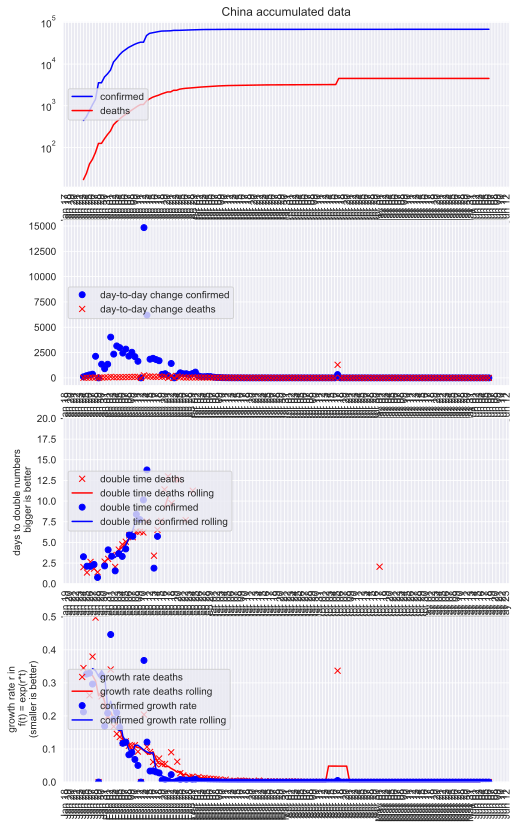

In [9]:
overview_plot(china)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12beaa9d0>,
      dtype=object)

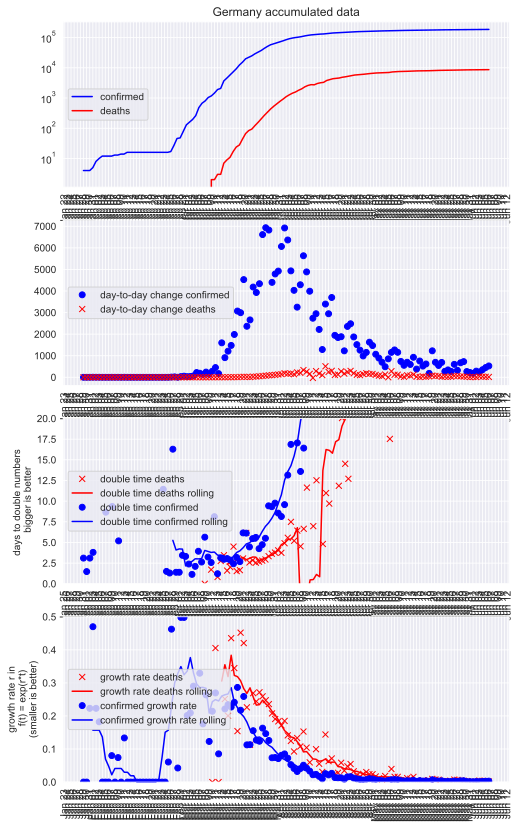

In [10]:
overview_plot(germany)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d002110>,
      dtype=object)

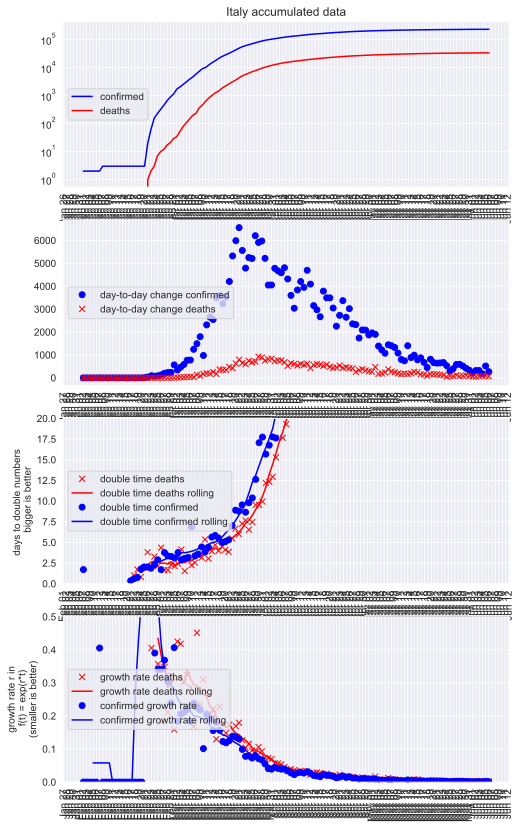

In [11]:
overview_plot(italy)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12d40db90>,
      dtype=object)

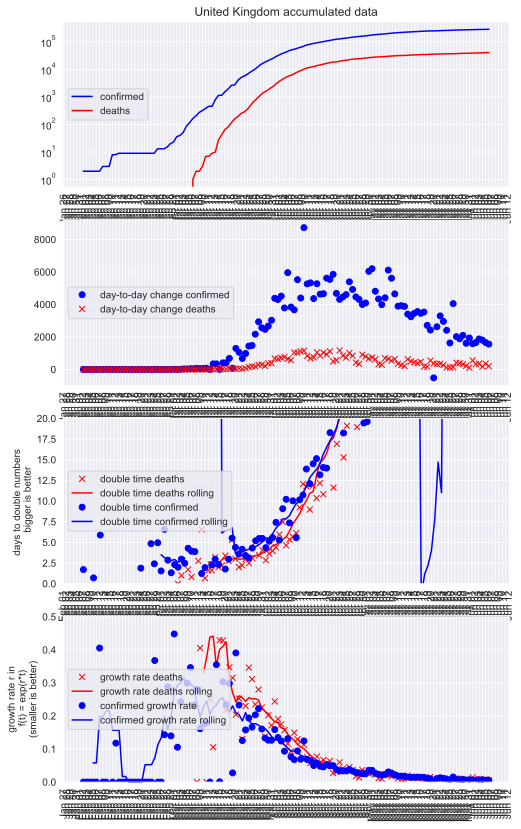

In [12]:
overview_plot(uk)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12e03bb10>,
      dtype=object)

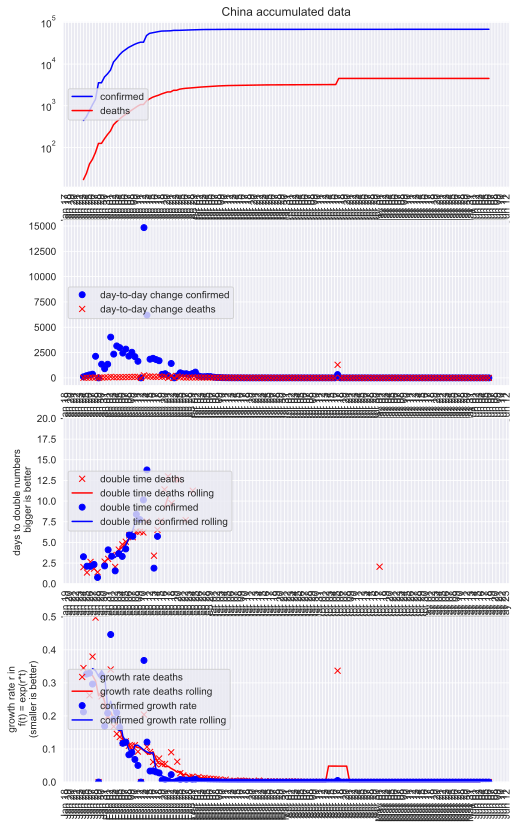

In [13]:
c = stack_country('China')
overview_plot(c)

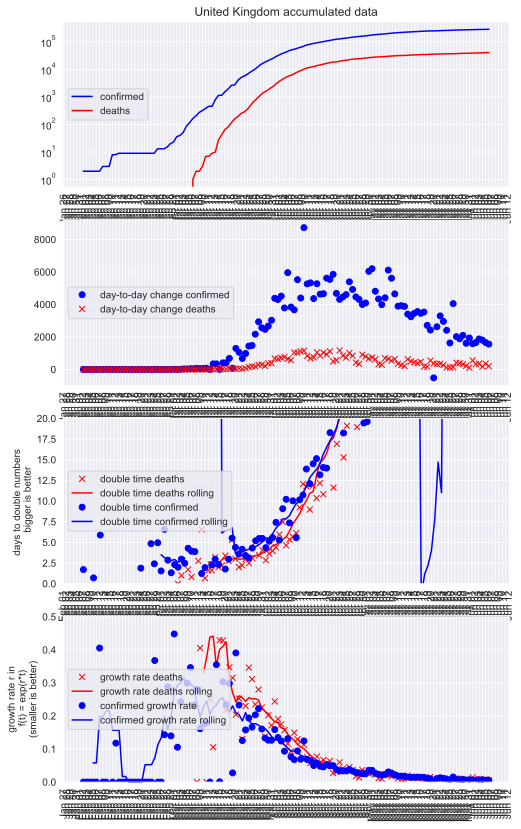

In [14]:
uk = stack_country('United Kingdom')
overview_plot(uk);

In [15]:
# compute doubling time (and growth rate) for a longer sequence of days (by fitting)


reduced chi^2: 1.0992852432438953
r   : 0.113
t0  : 4.32
a0  : 3.52



------------------------------------------------------------------
| FCN = 1.099                   |     Ncalls=105 (105 total)     |
| EDM = 2.56E-05 (Goal: 0.0002) |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | r    |   0.11    |   0.07    |            |            |         |         |       |
| 1 | t0   |     4     |    18     |            |            |         |         |       |
| 2 | a0   |     4     |     4     |            |            |         |         |       |
------------------------------------------------------------------------------------------

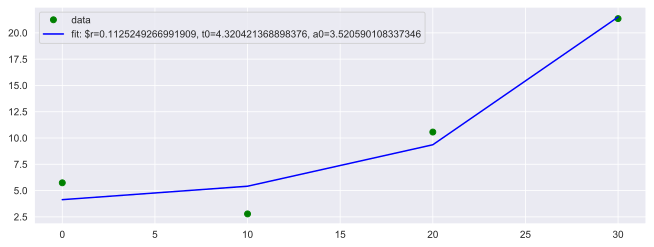

In [16]:
def pretty_params(**par):
    end='\n'
    s = ""
    for p in par:
        s += f"{p:3} : {par[p]:.3g}" + end
    return s


def model(xdata, r, t0, a0):
    return np.exp(r*(xdata-t0))+a0



def exp_fit(xdata, ydata, p0):
    r, t0, a0 = p0
    
    def least_squares(r, t0, a0):
        yvar = 10
        return sum((ydata - model(xdata, r, t0, a0))**2)/yvar
    
    m = iminuit.Minuit(least_squares, 
                       r=r, t0=t0, a0=a0, error_r=0.02, error_t0=0.2, error_a0=1, 
                       errordef=1)
    res = m.migrad()
    print(f"reduced chi^2: {m.fval / (len(ydata) - 3)}")
    r, t0, a0 = m.np_values()
    print(pretty_params(r=r, t0=t0, a0=a0))
    
    return m, res

def plot(xdata, ydata, r, t0, a0, annotate=""):
    #r, t0, a0 = m.np_values()

    fitted = model(xdata, r, t0, a0)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(xdata, ydata, 'og')
    ax.plot(xdata, fitted, '-b')
    ax.legend(["data", f"fit: $r={r}, t0={t0}, a0={a0}"])
    #ax.set_title(f"Infections $n(t)$ ({pretty_params(param_infections, end=', ')})")
    ax.set_title(annotate)
    #ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    #ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    #ax.tick_params(axis='x', rotation=90)
    #fig.savefig('figures/infections-with-model-fit.svg')
    # print(fitted_infections)
    return ax

def test_model(): 
    xdata = np.linspace(0, 30, 4)
    ydata = 0 + np.exp(0.1*(xdata - 0)) + 5*np.random.random_sample(xdata.shape)    
    m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
    r, t0, a0 = m.np_values()
    plot(xdata, ydata, r, t0, a0)
    return res, m, xdata, ydata


res, m, xdata, ydata = test_model()
res


reduced chi^2: 1.4364460704947649e-11
r   : -7.93e-07
t0  : 116
a0  : 6.81e+04

Double time: -874492.5 days


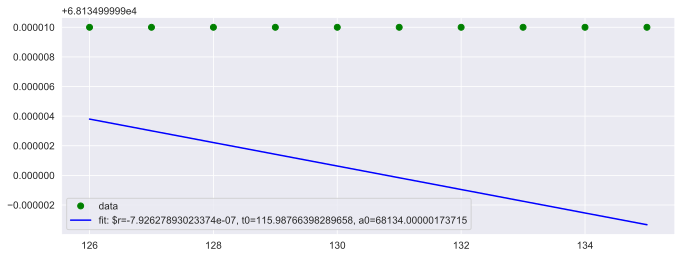

In [17]:
# Exponential fit through last n days
series = c['confirmed']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
plot(xdata, ydata, r, t0, a0)
print(f"Double time: {double_time(r):.1f} days")


reduced chi^2: 2.4148689692113344e-07
r   : 0.000446
t0  : 119
a0  : 4.51e+03

Double time: 1553.0 days


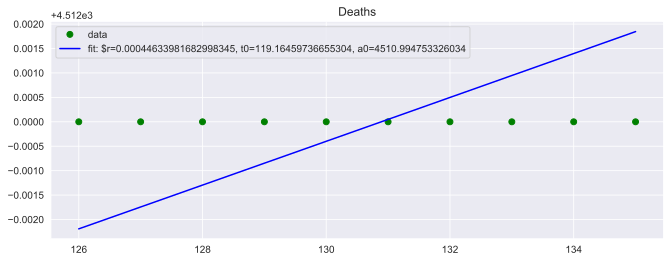

In [18]:
# Exponential fit through last n days, deaths
series = c['deaths']
start = -10
end = None
xdata_0 = (series.index[start:end] - series.index[0])
xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
ydata = series.values[start:end]
# Attempt fit
m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
r, t0, a0 = m.np_values()
ax = plot(xdata, ydata, r, t0, a0)
ax.set_title("Deaths")
print(f"Double time: {double_time(r):.1f} days")


In [19]:
def grow_rate_n_days(series, n=7):
    """Use the last 4 data points to estimate growth rate (and doubling time) for each day"""
    par = pd.DataFrame(index=series.index, columns=['r', 't0', 'a0', 'chi2'])
    print(f"Data stack shape = {series.shape}")
    for i in range(n, len(series)):
        start = i-n
        end = i
        print(f"Working on {start} to {end}, this is {start}/{len(series-n)}")
        xdata_0 = (series.index[start:end] - series.index[0])
        xdata = np.array((xdata_0.astype("timedelta64[D]").astype(float)))
        ydata = series.values[start:end]
        # Attempt fit
        m, res = exp_fit(xdata, ydata, (.1, 0.00, 0.0))
        r, t0, a0 = m.np_values()
        par.iloc[i].at['r'] = r
        par.iloc[i].at['t0'] = t0
        par.iloc[i].at['a0'] = a0
        print(f"r={r:10}, t0={t0:10}, a0={a0:10}")
        plot(xdata, ydata, r, t0, a0)
            
    return par

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 13642.117246379921
r   : 0.00747
t0  : -1.51e+03
a0  : 9.78e+04

r=0.00747373224846664, t0=-1509.287196325826, a0=97807.02276221655
Working on 1 to 8, this is 1/20
reduced chi^2: 5516.60762035933
r   : 0.00779
t0  : -1.41e+03
a0  : 1.19e+05

r=0.00778983526048916, t0=-1408.7283820779355, a0=119235.62487759198
Working on 2 to 9, this is 2/20
reduced chi^2: 2964.6299158014654
r   : 0.0119
t0  : -880
a0  : 1.44e+05

r=0.01185661578550191, t0=-879.8359651325229, a0=143895.7548784829
Working on 3 to 10, this is 3/20
reduced chi^2: 1780.2030079453948
r   : 0.0153
t0  : -660
a0  : 1.54e+05

r=0.015260065358385689, t0=-660.0827298676702, a0=154361.81024974454
Working on 4 to 11, this is 4/20
reduced chi^2: 539.8559613226867
r   : 0.151
t0  : -45.1
a0  : 1.78e+05

r=0.15100408781100136, t0=-45.141479514046274, a0=178043.6488104967
Working on 5 to 12, this is 5/20
reduced chi^2: 556.7904399892852
r   : 0.171
t0  : -38.3
a0  

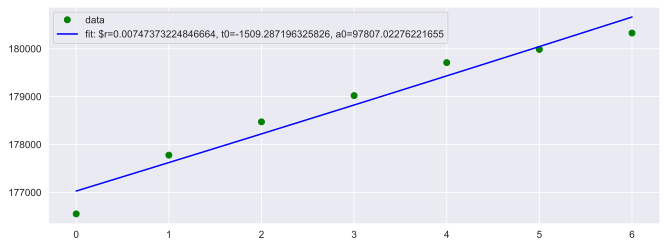

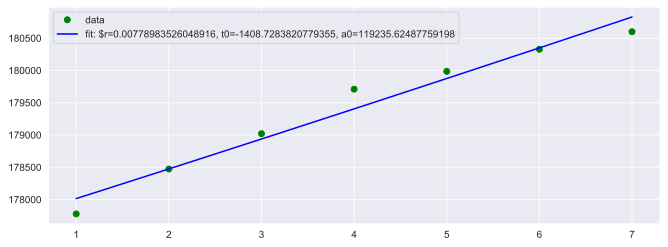

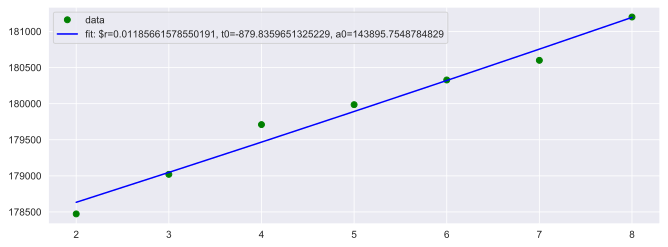

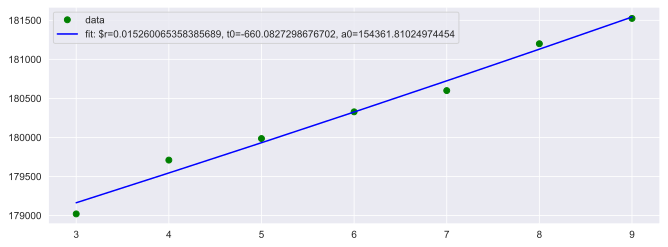

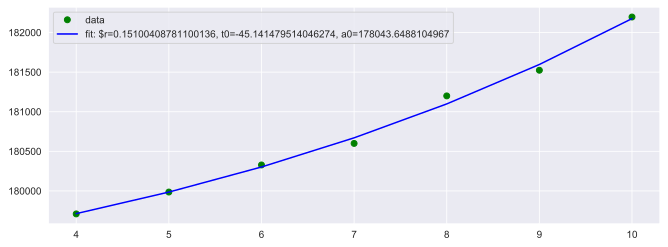

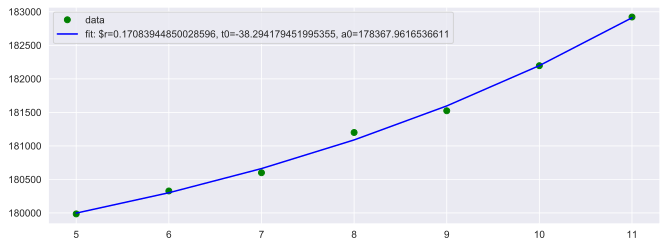

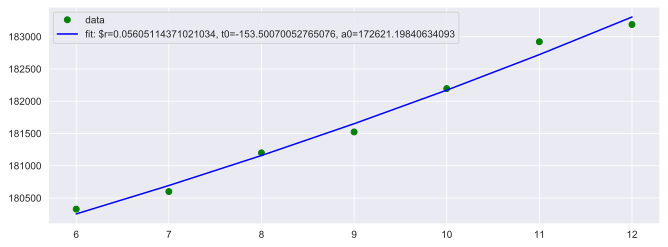

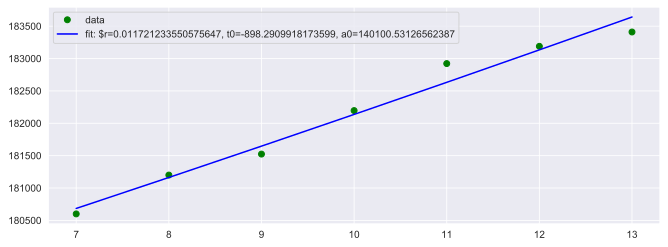

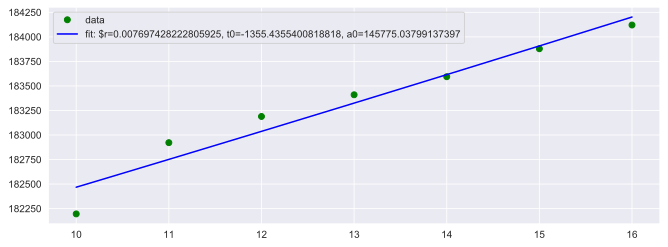

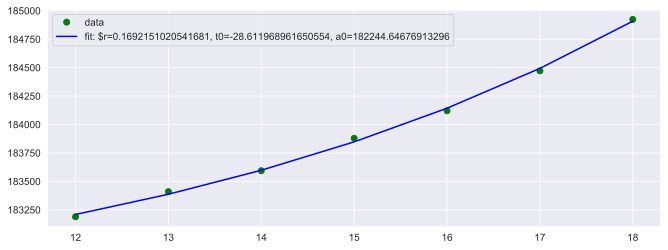

In [20]:
    
c = stack_country('Germany')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])
#

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 1057.668725496233
r   : 0.0139
t0  : -773
a0  : 1.8e+05

r=0.01387371501388954, t0=-773.1645115116632, a0=180461.75514077608
Working on 1 to 8, this is 1/20
reduced chi^2: 2702.876837390079
r   : 0.0121
t0  : -890
a0  : 1.79e+05

r=0.012082558601472398, t0=-890.3130186348533, a0=179270.7888136356
Working on 2 to 9, this is 2/20
reduced chi^2: 3950.6811696541126
r   : 0.0085
t0  : -1.3e+03
a0  : 1.66e+05

r=0.008500555320806139, t0=-1295.5213868691665, a0=165853.5624566221
Working on 3 to 10, this is 3/20
reduced chi^2: 2869.5961154310157
r   : 0.0118
t0  : -896
a0  : 1.87e+05

r=0.011808977397612318, t0=-896.1698565343999, a0=187310.88665466252
Working on 4 to 11, this is 4/20
reduced chi^2: 1590.0407867558786
r   : 0.0184
t0  : -547
a0  : 2.04e+05

r=0.01838563476564199, t0=-546.5426131907193, a0=203888.45004667775
Working on 5 to 12, this is 5/20
reduced chi^2: 559.787273422105
r   : 0.0879
t0  : -89.8
a0  : 2.25

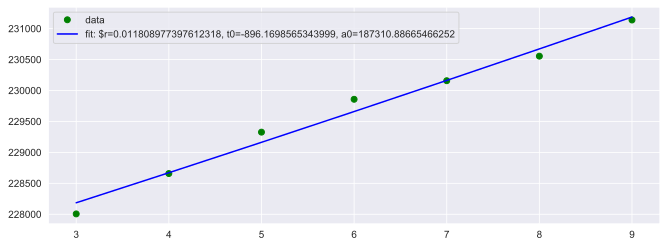

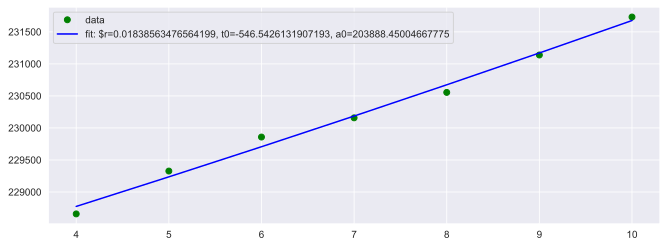

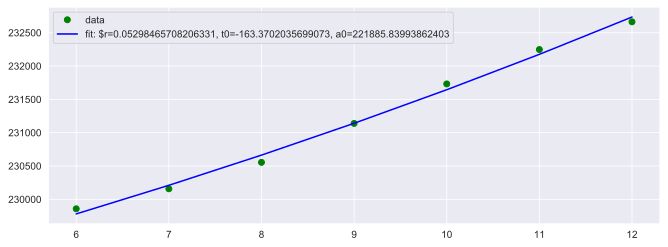

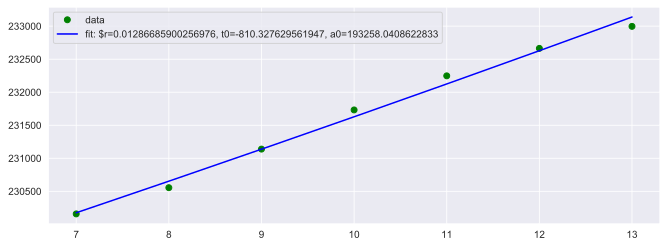

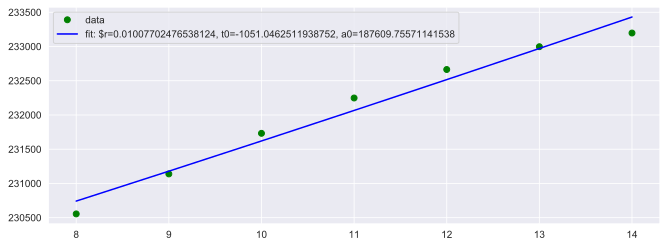

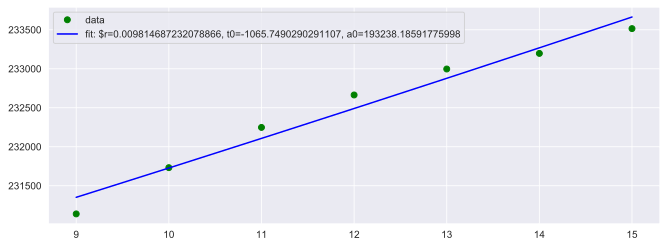

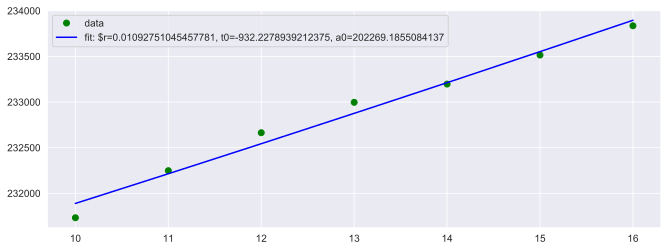

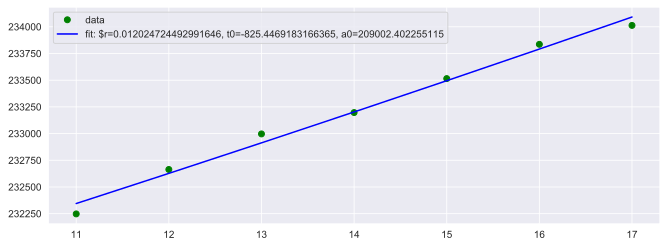

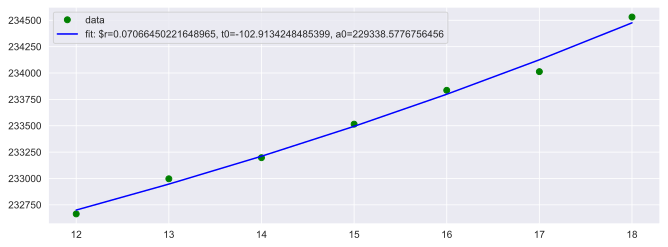

In [21]:
c = stack_country('Italy')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 545977.8604072982
r   : 0.0195
t0  : -713
a0  : 4.01e+05

r=0.019506300354602626, t0=-713.4953670393647, a0=400888.3283521651
Working on 1 to 8, this is 1/20
reduced chi^2: 1283764.2361925081
r   : 0.016
t0  : -879
a0  : 1.96e+05

r=0.016023634318353044, t0=-879.2655932876002, a0=195804.4609774923
Working on 2 to 9, this is 2/20
reduced chi^2: 1609522.7292186578
r   : 0.0157
t0  : -897
a0  : 2.54e+05

r=0.01566878386370195, t0=-896.5964112486395, a0=253797.1279577211
Working on 3 to 10, this is 3/20
reduced chi^2: 985093.8266060821
r   : 0.0126
t0  : -1.13e+03
a0  : 3.99e+04

r=0.012624183879815159, t0=-1125.6244263015903, a0=39864.97639664081
Working on 4 to 11, this is 4/20
reduced chi^2: 380231.2288811623
r   : 0.0187
t0  : -735
a0  : 6.05e+05

r=0.018691931686316072, t0=-735.0421351100259, a0=604603.0932392967
Working on 5 to 12, this is 5/20
reduced chi^2: 274802.9871991846
r   : 0.0431
t0  : -295
a0  : 1.21e+

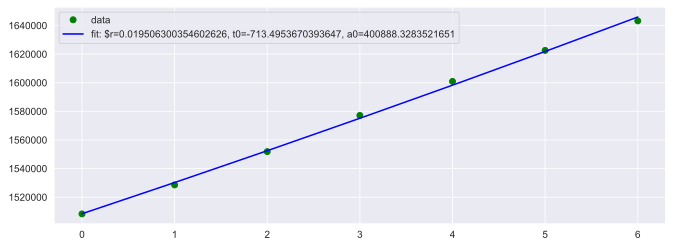

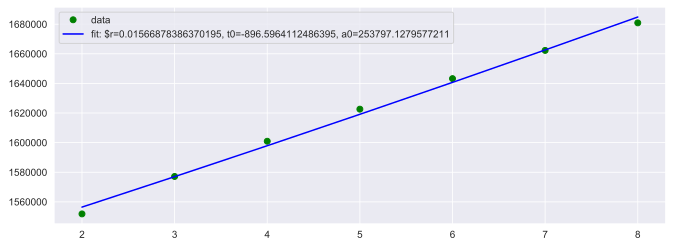

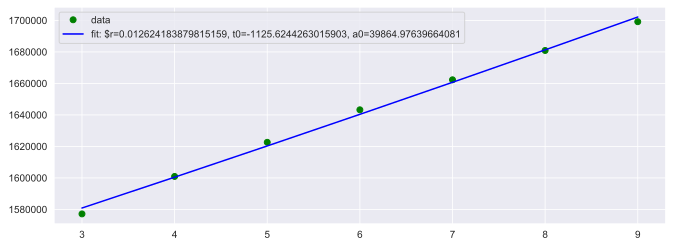

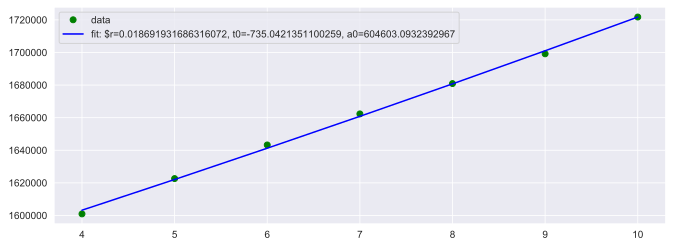

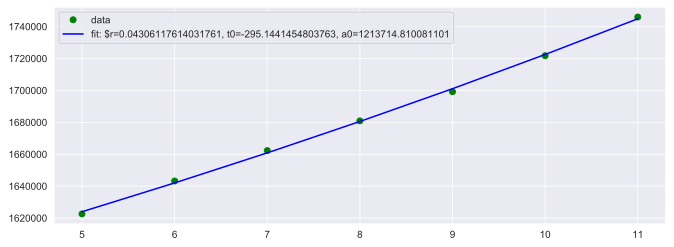

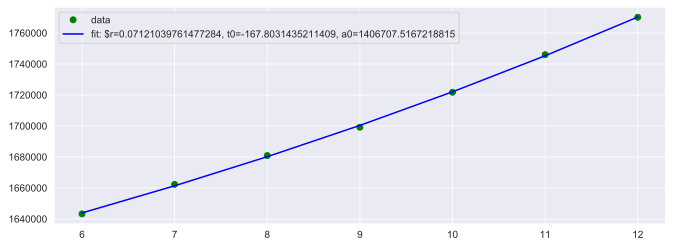

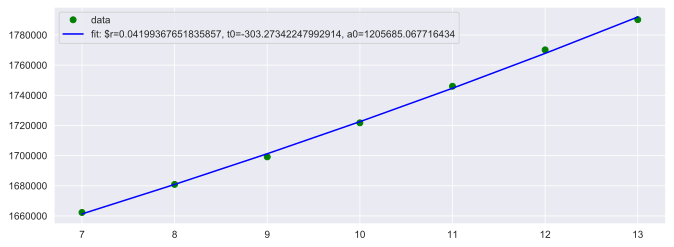

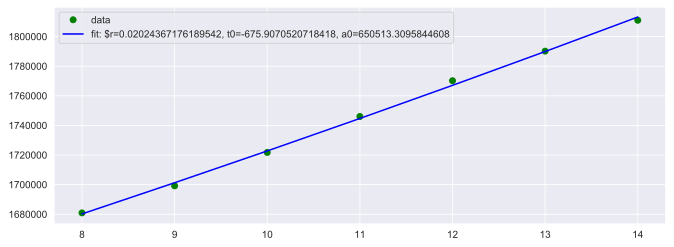

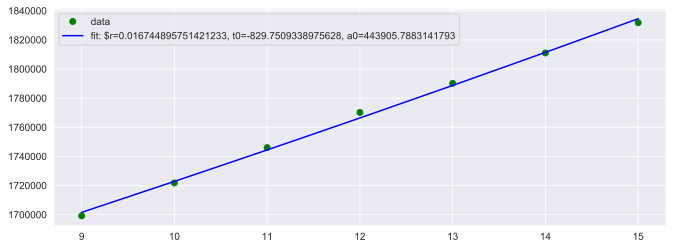

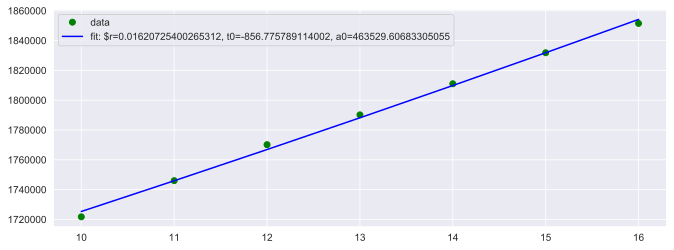

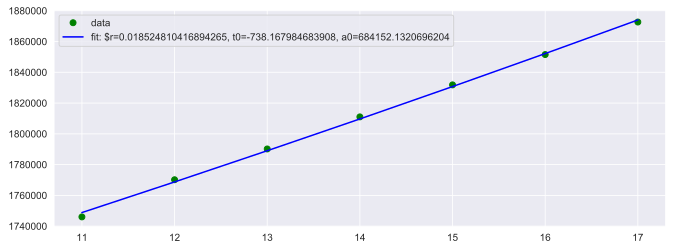

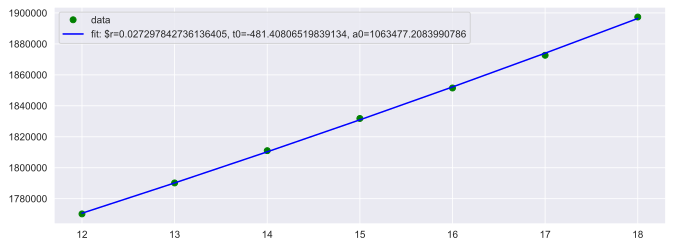

In [22]:
c = stack_country('US')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 3435.483519894945
r   : 0.0674
t0  : -129
a0  : 2.24e+05

r=0.06737944811512946, t0=-128.7755891274949, a0=224300.1295730061
Working on 1 to 8, this is 1/20
reduced chi^2: 9111.97476035907
r   : 0.301
t0  : -21.1
a0  : 2.3e+05

r=0.3009619300176155, t0=-21.11640055132069, a0=229923.48932487037
Working on 2 to 9, this is 2/20
reduced chi^2: 12301.864813189934
r   : 0.146
t0  : -53.6
a0  : 2.28e+05

r=0.14565237810019202, t0=-53.57684451883297, a0=227572.03973901845
Working on 3 to 10, this is 3/20
reduced chi^2: 16699.299174776257
r   : 0.0695
t0  : -128
a0  : 2.23e+05

r=0.06951805384052513, t0=-127.68970745416706, a0=222612.4032423051
Working on 4 to 11, this is 4/20
reduced chi^2: 41214.55319890393
r   : 0.00965
t0  : -1.15e+03
a0  : 1.65e+05

r=0.009652092320093763, t0=-1147.8143038163514, a0=164804.39753114685
Working on 5 to 12, this is 5/20
reduced chi^2: 44371.52727698364
r   : 0.00862
t0  : -1.29e+03
a0  : 

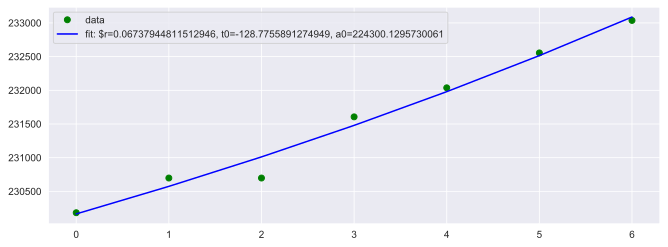

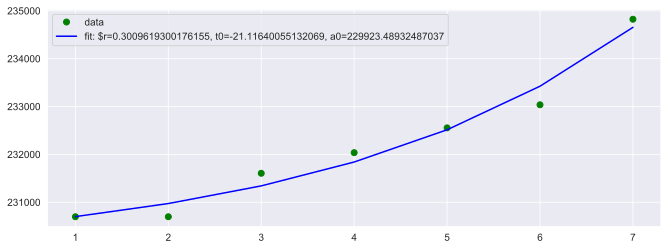

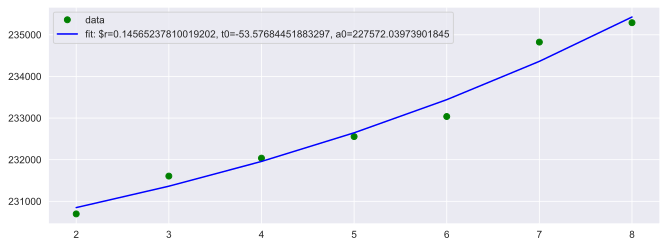

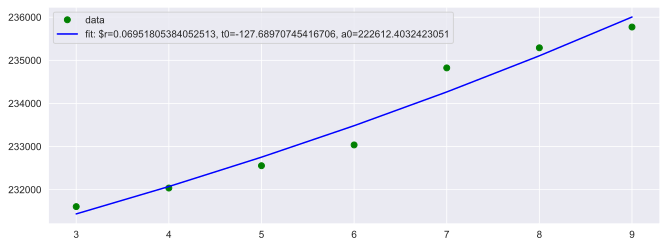

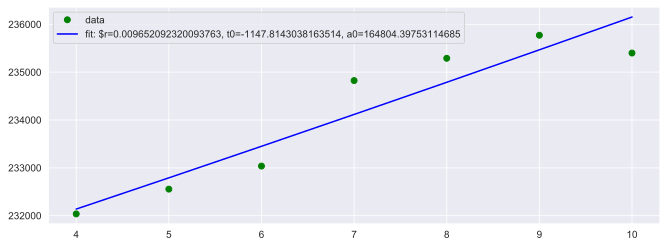

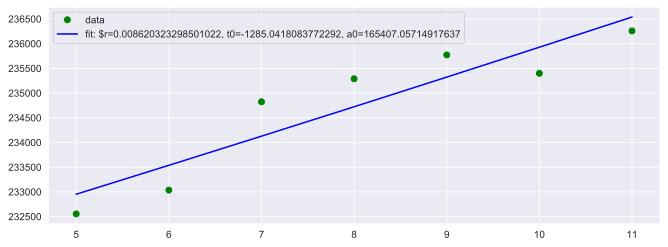

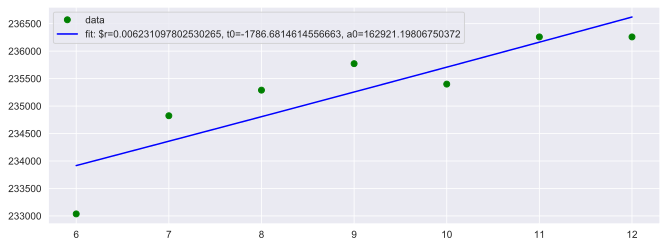

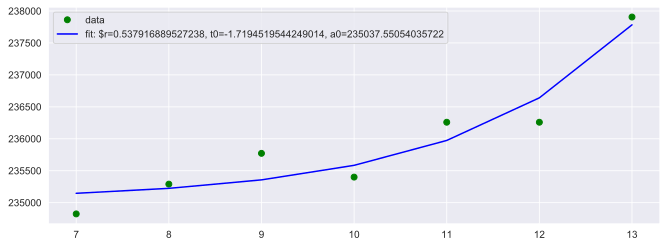

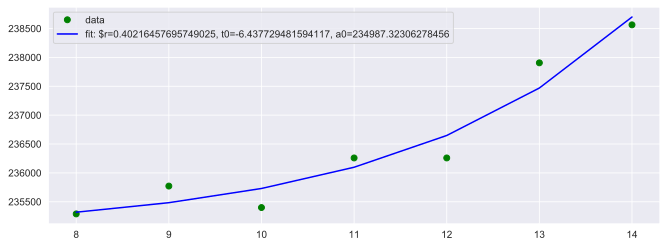

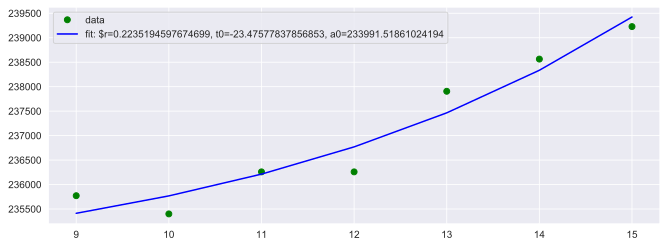

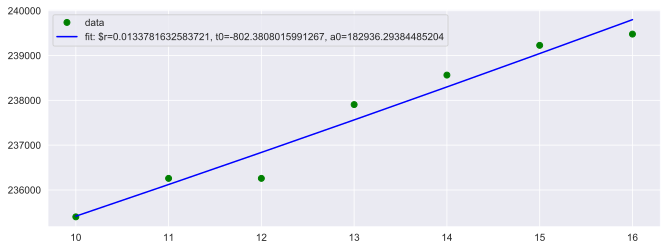

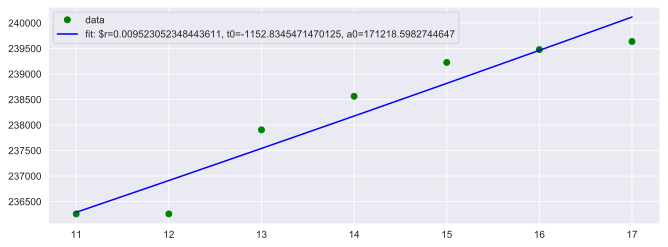

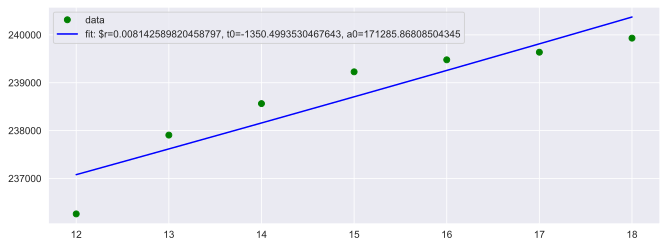

In [36]:
c = stack_country('Spain')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

Data stack shape = (20,)
Working on 0 to 7, this is 0/20
reduced chi^2: 0.011801307633711039
r   : 0.0807
t0  : -8.71
a0  : 6.81e+04

r=0.0806521248883505, t0=-8.708094041409167, a0=68131.9588537393
Working on 1 to 8, this is 1/20
reduced chi^2: 0.014718752766389412
r   : 0.0569
t0  : -15.1
a0  : 6.81e+04

r=0.056864527896594456, t0=-15.081464374557832, a0=68131.7266913687
Working on 2 to 9, this is 2/20


RuntimeError: exception was raised in user function
User function arguments:
     r = -216.477667
    t0 = +7.012450
    a0 = +68127.142611
Original python exception in user function:
OverflowError: (34, 'Result too large')
  File "<ipython-input-29-6349838f1c32>", line 19, in least_squares
    return sum((ydata - model(xdata, r, t0, a0))**2)/yvar


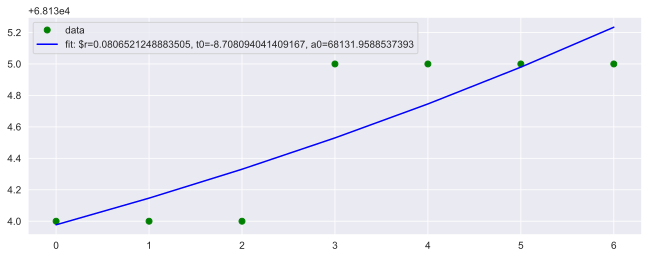

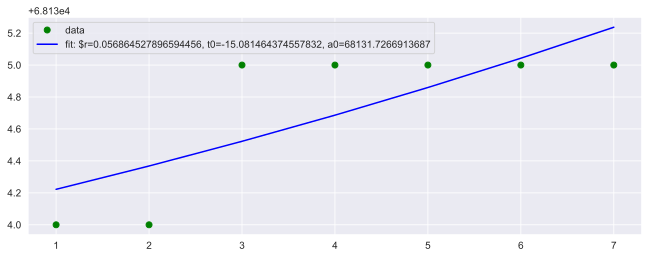

In [37]:
c = stack_country('China')
p_confirmed = grow_rate_n_days(c['confirmed'][-20:])

In [39]:
p_confirmed.tail(n=10)

r       t0      a0 chi2
2020-05-25   0.0695181  -127.69  222612  NaN
2020-05-26  0.00965209 -1147.81  164804  NaN
2020-05-27  0.00862032 -1285.04  165407  NaN
2020-05-28   0.0062311 -1786.68  162921  NaN
2020-05-29    0.537917 -1.71945  235038  NaN
2020-05-30    0.402165 -6.43773  234987  NaN
2020-05-31    0.223519 -23.4758  233992  NaN
2020-06-01   0.0133782 -802.381  182936  NaN
2020-06-02  0.00952305 -1152.83  171219  NaN
2020-06-03  0.00814259  -1350.5  171286  NaN

In [40]:
p_confirmed['double_time'] = double_time(p_confirmed['r'])

In [41]:
p_confirmed.tail(n=10)

r       t0      a0 chi2 double_time
2020-05-25   0.0695181  -127.69  222612  NaN     9.97075
2020-05-26  0.00965209 -1147.81  164804  NaN     71.8132
2020-05-27  0.00862032 -1285.04  165407  NaN     80.4085
2020-05-28   0.0062311 -1786.68  162921  NaN      111.24
2020-05-29    0.537917 -1.71945  235038  NaN     1.28858
2020-05-30    0.402165 -6.43773  234987  NaN     1.72354
2020-05-31    0.223519 -23.4758  233992  NaN     3.10106
2020-06-01   0.0133782 -802.381  182936  NaN     51.8118
2020-06-02  0.00952305 -1152.83  171219  NaN     72.7862
2020-06-03  0.00814259  -1350.5  171286  NaN     85.1261

Log basics ...

In [23]:
ax0, ax1, ax2, ax3 = overview_plot(c)
ax2.plot(p_confirmed.index, p_confirmed['double_time'], 'xb', label='double time confirmed fit')


KeyError: 'double_time'

In [24]:
from math import log 
log(2)/log(0.5)

-1.0

From https://en.wikipedia.org/wiki/Doubling_time
    
$$\Delta t = (t_2 - t_1) * \left(\frac{\log(2)}{\log
    \left(\frac{f(t_2)}{f(t_1)}\right)}\right)$$

In [25]:
from math import log
def double_time_exponential2(t1, t2, q1, q2):
    return (t2 - t1) * (log(2) / log(q2/q1) )

def growth_rate2(double_time):
    return log(2)/double_time


t1, t2, q1, q2 = 0, 1, 1, 2
double_time_exponential2(t1, t2, q1, q2), growth_rate2(double_time_exponential2(t1, t2, q1, q2) )

(1.0, 0.6931471805599453)

In [26]:
2**(1/double_time_exponential2(0, 1, 1, 21))

21.000000000000007

In [27]:
2/math.exp(1)

0.7357588823428847

In [28]:
math.exp(0.5)/2

0.8243606353500641

In [29]:
math.exp(0.6931471805599453*4)

15.999999999999998

In [30]:
def logplots(c, columns, ax=None, alpha=0.7):
    """Dataframe c with colunmname 'column' contains the data we are interested in.
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8))
        ax = ax
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        pass
    
    for col in columns:
        assert col in c.columns
        c2 = c.copy()
        c2['change'] = c2[col].diff()
    
        ax.plot(c2[col], c2['change'], '-o', label=c.country + " " + col, alpha=alpha) 
    
    ax.legend()
    ax.set_xlabel("total numbers")
    ax.set_ylabel("daily change in numbers")
    return ax

    
    
c = stack_country("Germany")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'])

c = stack_country("China")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Italy")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("Spain")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("US")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()
c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)

c = stack_country("India")
c_roll = c[['confirmed', 'deaths']].rolling(7, center=True).mean()

c_roll.country = c.country
ax = logplots(c_roll, ['confirmed', 'deaths'], ax=ax)


In [31]:
c

confirmed deaths  days-td   days new_confirmed new_deaths  \
2020-01-31         1      0   0 days    0.0           NaN        NaN   
2020-02-01         1      0   1 days    1.0             0          0   
2020-02-02         2      0   2 days    2.0             1          0   
2020-02-03         3      0   3 days    3.0             1          0   
2020-02-04         3      0   4 days    4.0             0          0   
...              ...    ...      ...    ...           ...        ...   
2020-06-02    207191   5829 123 days  123.0          8821        221   
2020-06-03    216824   6088 124 days  124.0          9633        259   
2020-06-04    226713   6363 125 days  125.0          9889        275   
2020-06-05    236184   6649 126 days  126.0          9471        286   
2020-06-06    246622   6946 127 days  127.0         10438        297   

            confirmed_pct  deaths_pct  deaths_double_time  \
2020-01-31            NaN         NaN                 NaN   
2020-02-01       1.000000         NaN                 NaN   
2020-02-02       2.000000         NaN                 NaN   
2020-02-03       1.500000         NaN                 NaN   
2020-02-04       1.000000         NaN                 NaN   
...                   ...         ...                 ...   
2020-06-02       1.044467    1.039408           17.933343   
2020-06-03       1.046493    1.044433           15.943888   
2020-06-04       1.045608    1.045171           15.689040   
2020-06-05       1.041775    1.044947           15.765347   
2020-06-06       1.044194    1.044668           15.861678   

            confirmed_double_time  deaths_growth_rate  confirmed_growth_rate  
2020-01-31                    NaN                 NaN                    NaN  
2020-02-01                    inf                 NaN               0.000000  
2020-02-02               1.000000                 NaN               0.693147  
2020-02-03               1.709511                 NaN               0.405465  
2020-02-04                    inf                 NaN               0.000000  
...                           ...                 ...                    ...  
2020-06-02              15.931818            0.038651               0.043507  
2020-06-03              15.252477            0.043474               0.045445  
2020-06-04              15.541787            0.044180               0.044599  
2020-06-05              16.936489            0.043967               0.040926  
2020-06-06              16.028141            0.043699               0.043246  

[128 rows x 12 columns]

In [32]:
confirmed.loc['Germany']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-02 00:00:00    183879
2020-06-03 00:00:00    184121
2020-06-04 00:00:00    184472
2020-06-05 00:00:00    184924
2020-06-06 00:00:00    185450
Name: Germany, Length: 138, dtype: object

In [33]:
deaths.loc['Germany']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-06-02 00:00:00    8563
2020-06-03 00:00:00    8602
2020-06-04 00:00:00    8635
2020-06-05 00:00:00    8658
2020-06-06 00:00:00    8673
Name: Germany, Length: 138, dtype: object

In [34]:
confirmed.loc['US']

Province/State             NaN
2020-01-22 00:00:00          1
2020-01-23 00:00:00          1
2020-01-24 00:00:00          2
2020-01-25 00:00:00          2
                        ...   
2020-06-02 00:00:00    1831821
2020-06-03 00:00:00    1851520
2020-06-04 00:00:00    1872660
2020-06-05 00:00:00    1897380
2020-06-06 00:00:00    1920061
Name: US, Length: 138, dtype: object

In [35]:
deaths.loc['US']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-02 00:00:00    106180
2020-06-03 00:00:00    107175
2020-06-04 00:00:00    108211
2020-06-05 00:00:00    109132
2020-06-06 00:00:00    109802
Name: US, Length: 138, dtype: object

In [36]:
confirmed.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    1                    9   
China                  Beijing                   14                   22   
China                Chongqing                    6                    9   
China                   Fujian                    1                    5   
China                    Gansu                    0                    2   
China                Guangdong                   26                   32   
China                  Guangxi                    2                    5   
China                  Guizhou                    1                    3   
China                   Hainan                    4                    5   
China                    Hebei                    1                    1   
China             Heilongjiang                    0                    2   
China                    Henan                    5                    5   
China                Hong Kong                    0                    2   
China                    Hubei                  444                  444   
China                    Hunan                    4                    9   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    1                    5   
China                  Jiangxi                    2                    7   
China                    Jilin                    0                    1   
China                 Liaoning                    2                    3   
China                    Macau                    1                    2   
China                  Ningxia                    1                    1   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    3   
China                 Shandong                    2                    6   
China                 Shanghai                    9                   16   
China                   Shanxi                    1                    1   
China                  Sichuan                    5                    8   
China                  Tianjin                    4                    4   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    2   
China                   Yunnan                    1                    2   
China                 Zhejiang                   10                   27   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                            15                   39                   60   
China                            36                   41                   68   
China                            27                   57                   75   
China                            10                   18                   35   
China                             2                    4                    7   
China                            53                   78                  111   
China                            23                   23                   36   
China                             3                    4                    5   
China                             8                   19                   22   
China                             2                    8                   13   
China                             4                    9                   15   
China                             9                   32                   83   
China                             2                    5                    8   
China                           549                  761                 1058   
China                            24                   43   

In [37]:
deaths.loc['China']

Province/State  2020-01-22 00:00:00  2020-01-23 00:00:00  \
Country/Region                                                             
China                    Anhui                    0                    0   
China                  Beijing                    0                    0   
China                Chongqing                    0                    0   
China                   Fujian                    0                    0   
China                    Gansu                    0                    0   
China                Guangdong                    0                    0   
China                  Guangxi                    0                    0   
China                  Guizhou                    0                    0   
China                   Hainan                    0                    0   
China                    Hebei                    0                    1   
China             Heilongjiang                    0                    0   
China                    Henan                    0                    0   
China                Hong Kong                    0                    0   
China                    Hubei                   17                   17   
China                    Hunan                    0                    0   
China           Inner Mongolia                    0                    0   
China                  Jiangsu                    0                    0   
China                  Jiangxi                    0                    0   
China                    Jilin                    0                    0   
China                 Liaoning                    0                    0   
China                    Macau                    0                    0   
China                  Ningxia                    0                    0   
China                  Qinghai                    0                    0   
China                  Shaanxi                    0                    0   
China                 Shandong                    0                    0   
China                 Shanghai                    0                    0   
China                   Shanxi                    0                    0   
China                  Sichuan                    0                    0   
China                  Tianjin                    0                    0   
China                    Tibet                    0                    0   
China                 Xinjiang                    0                    0   
China                   Yunnan                    0                    0   
China                 Zhejiang                    0                    0   

                2020-01-24 00:00:00  2020-01-25 00:00:00  2020-01-26 00:00:00  \
Country/Region                                                                  
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             0                    0                    0   
China                             1                    1                    1   
China                             1                    1                    1   
China                             0                    0                    1   
China                             0                    0                    0   
China                            24                   40                   52   
China                             0                    0   

In [38]:
confirmed.loc['Italy']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-02 00:00:00    233515
2020-06-03 00:00:00    233836
2020-06-04 00:00:00    234013
2020-06-05 00:00:00    234531
2020-06-06 00:00:00    234801
Name: Italy, Length: 138, dtype: object

In [39]:
deaths.loc['Italy']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-06-02 00:00:00    33530
2020-06-03 00:00:00    33601
2020-06-04 00:00:00    33689
2020-06-05 00:00:00    33774
2020-06-06 00:00:00    33846
Name: Italy, Length: 138, dtype: object

In [40]:
confirmed.loc['Spain']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-02 00:00:00    239932
2020-06-03 00:00:00    240326
2020-06-04 00:00:00    240660
2020-06-05 00:00:00    240978
2020-06-06 00:00:00    241310
Name: Spain, Length: 138, dtype: object

In [41]:
deaths.loc['Spain']

Province/State           NaN
2020-01-22 00:00:00        0
2020-01-23 00:00:00        0
2020-01-24 00:00:00        0
2020-01-25 00:00:00        0
                       ...  
2020-06-02 00:00:00    27127
2020-06-03 00:00:00    27128
2020-06-04 00:00:00    27133
2020-06-05 00:00:00    27134
2020-06-06 00:00:00    27135
Name: Spain, Length: 138, dtype: object

In [42]:
confirmed.loc['India']

Province/State            NaN
2020-01-22 00:00:00         0
2020-01-23 00:00:00         0
2020-01-24 00:00:00         0
2020-01-25 00:00:00         0
                        ...  
2020-06-02 00:00:00    207191
2020-06-03 00:00:00    216824
2020-06-04 00:00:00    226713
2020-06-05 00:00:00    236184
2020-06-06 00:00:00    246622
Name: India, Length: 138, dtype: object

In [43]:
deaths.loc['India']

Province/State          NaN
2020-01-22 00:00:00       0
2020-01-23 00:00:00       0
2020-01-24 00:00:00       0
2020-01-25 00:00:00       0
                       ... 
2020-06-02 00:00:00    5829
2020-06-03 00:00:00    6088
2020-06-04 00:00:00    6363
2020-06-05 00:00:00    6649
2020-06-06 00:00:00    6946
Name: India, Length: 138, dtype: object